# Contesto

Il primo dataset scelto per svolgere la seguente analisi riguarda la rilevazione oraria degli autoveicoli tramite spire e loro posizione geografica. I dati sono raccolti nella città di Bologna da Gennaio a Settembre 2024.

Il secondo dataset utilizzato nella parte di integrazione e analisi delle correlazioni riguarda le rilevazioni di 8 agenti inquinanti da tre centraline posizionate in punti diversi della città di Bologna da fine Dicembre 2023 a inizio Ottobre 2024.

Fonti:

https://opendata.comune.bologna.it/explore/dataset/rilevazione-flusso-veicoli-tramite-spire-anno-2024/information/?disjunctive.codice_spira&disjunctive.tipologia&disjunctive.nome_via&disjunctive.stato

https://opendata.comune.bologna.it/explore/dataset/centraline-qualita-aria/information/?disjunctive.agente_atm


# Esplorazione e pulizia dei dati

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [52]:
file_path = 'rilevazione-flusso-veicoli-tramite-spire-anno-2024.csv'
df = pd.read_csv(file_path, sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231974 entries, 0 to 231973
Data columns (total 45 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   data                       231974 non-null  object 
 1   codice spira               231974 non-null  object 
 2   00:00-01:00                231974 non-null  int64  
 3   01:00-02:00                231974 non-null  int64  
 4   02:00-03:00                231974 non-null  int64  
 5   03:00-04:00                231974 non-null  int64  
 6   04:00-05:00                231974 non-null  int64  
 7   05:00-06:00                231974 non-null  int64  
 8   06:00-07:00                231974 non-null  int64  
 9   07:00-08:00                231974 non-null  int64  
 10  08:00-09:00                231974 non-null  int64  
 11  09:00-10:00                231974 non-null  int64  
 12  10:00-11:00                231974 non-null  int64  
 13  11:00-12:00                23

In [3]:
df.head()

,data,codice spira,00:00-01:00,01:00-02:00,02:00-03:00,03:00-04:00,04:00-05:00,05:00-06:00,06:00-07:00,07:00-08:00,...,ordinanza,stato,codimpsem,direzione,angolo,longitudine,latitudine,geopoint,ID_univoco_stazione_spira,giorno settimana
0,2024-05-01,0.127 1.3 2 1,42,12,0,3,2,8,6,8,...,4000/343434,A,315,S,156,11.349221,44.500360,"44.5003601607765, 11.3492210523335",14,Mercoledì
1,2024-05-01,0.127 1.14 4 1,9,8,3,2,2,3,6,19,...,4000/343434,A,92,E,264,11.339836,44.490116,"44.4901162203284, 11.3398356513878",5,Mercoledì
2,2024-05-01,0.127 1.15 6 1,52,51,34,17,11,11,15,20,...,4000/343434,A,324,S,168,11.343443,44.490027,"44.4900271601578, 11.3434427397635",7,Mercoledì
3,2024-05-01,0.127 1.16 2 1,0,3,5,2,3,16,9,3,...,4000/343434,A,117,NO,352,11.351981,44.494104,"44.4941035248986, 11.3519809631422",8,Mercoledì
4,2024-05-01,0.127 1.17 4 1,23,25,10,4,6,10,10,10,...,4000/343434,A,325,NE,333,11.350903,44.492369,"44.4923692879684, 11.3509026754331",10,Mercoledì


In [4]:
# Rimuovo le righe con valori nulli
df.dropna(inplace=True)

In [5]:
# Converto la colonna 'data' in formato datetime
df['data'] = pd.to_datetime(df['data'])

# Rendo categorica la colonna 'giorno settimana'
df['giorno settimana'] = df['giorno settimana'].astype('category')

# Esploro i dati per verificare
df.dtypes

data                         datetime64[ns]
codice spira                         object
00:00-01:00                           int64
01:00-02:00                           int64
02:00-03:00                           int64
03:00-04:00                           int64
04:00-05:00                           int64
05:00-06:00                           int64
06:00-07:00                           int64
07:00-08:00                           int64
08:00-09:00                           int64
09:00-10:00                           int64
10:00-11:00                           int64
11:00-12:00                           int64
12:00-13:00                           int64
13:00-14:00                           int64
14:00-15:00                           int64
15:00-16:00                           int64
16:00-17:00                           int64
17:00-18:00                           int64
18:00-19:00                           int64
19:00-20:00                           int64
20:00-21:00                     

C:\Users\giuli\AppData\Local\Temp\ipykernel_9356\3928617490.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hourly_avg = df_hourly.groupby('giorno settimana').mean()


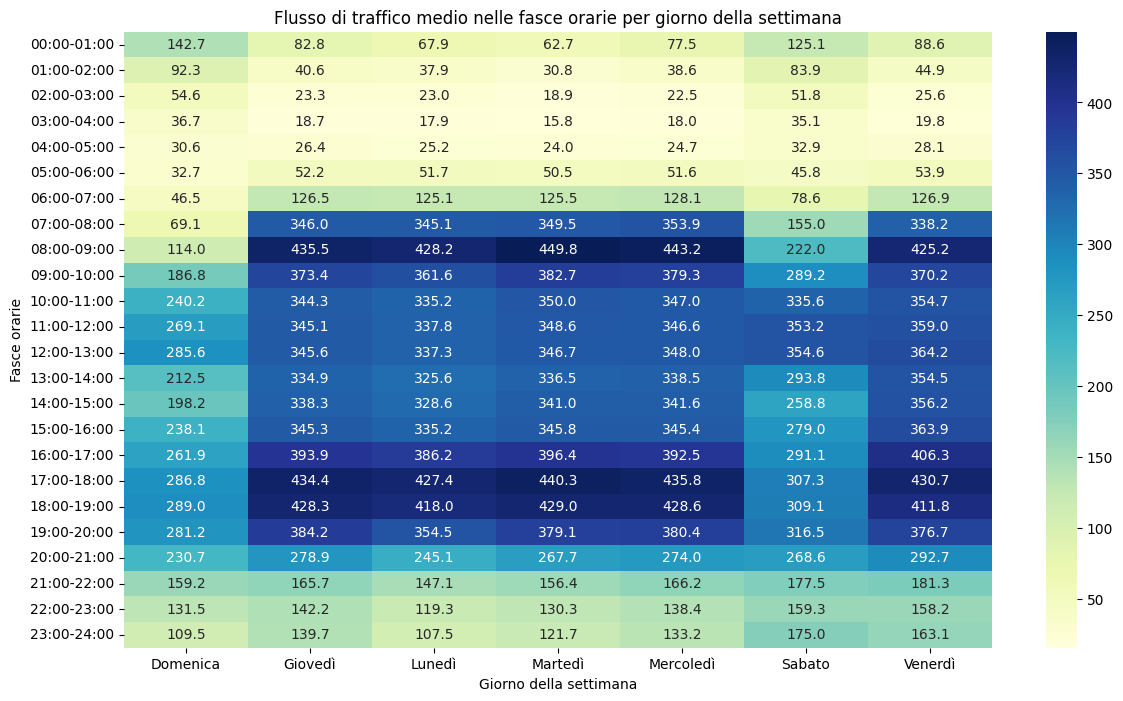

In [8]:
# Raggruppo i dati per giorno e calcolo la media del flusso veicolare nelle fasce orarie
df_hourly = df[['giorno settimana', '00:00-01:00', '01:00-02:00', '02:00-03:00', '03:00-04:00', 
                '04:00-05:00', '05:00-06:00', '06:00-07:00', '07:00-08:00', '08:00-09:00',
                '09:00-10:00', '10:00-11:00', '11:00-12:00', '12:00-13:00', '13:00-14:00', 
                '14:00-15:00', '15:00-16:00', '16:00-17:00', '17:00-18:00', '18:00-19:00',
                '19:00-20:00', '20:00-21:00', '21:00-22:00', '22:00-23:00', '23:00-24:00']]

# Calcola la media per fascia oraria
df_hourly_avg = df_hourly.groupby('giorno settimana').mean()

# Visualizza i dati
plt.figure(figsize=(14, 8))
sns.heatmap(df_hourly_avg.T, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Flusso di traffico medio nelle fasce orarie per giorno della settimana')
plt.xlabel('Giorno della settimana')
plt.ylabel('Fasce orarie')
plt.show()

In [9]:
#sostituisco i nomi delle colonne indicanti la fascia oraria con una notazione più semplice
df.rename(columns={"00:00-01:00": "P1", "01:00-02:00": "P2", "02:00-03:00": "P3", "03:00-04:00": "P4", "04:00-05:00": "P5", "05:00-06:00": "P6", "06:00-07:00": "P7", "07:00-08:00": "P8", "08:00-09:00": "P9", "09:00-10:00": "P10", "10:00-11:00": "P11", "11:00-12:00": "P12", "12:00-13:00": "P13", "13:00-14:00": "P14", "14:00-15:00": "P15", "15:00-16:00": "P16", "16:00-17:00": "P17", "17:00-18:00": "P18", "18:00-19:00": "P19", "19:00-20:00": "P20", "20:00-21:00": "P21", "21:00-22:00": "P22", "22:00-23:00": "P23", "23:00-24:00": "P24", "codice via":"codice_via"}
, inplace=True)

In [17]:
#ordino le righe del dataframe in base ai valori della colonna "data"
df.sort_values(by=["data"], inplace=True)

In [44]:
#ricavo l'intervallo di tempo preciso all'interno del quale sono stati raccolti i dati delle spire 
df["data"].min(), df["data"].max()

(Timestamp('2024-01-01 00:00:00'), Timestamp('2024-09-30 00:00:00'))

In [47]:
#imposto la colonna data come indice del df
df.set_index('data', inplace=True)

In [48]:
df.head()

,codice spira,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,ordinanza,stato,codimpsem,direzione,angolo,longitudine,latitudine,geopoint,ID_univoco_stazione_spira,giorno settimana
data,,,,,,,,,,,,,,,,,,,,,
2024-01-01,0.127 3.87 2 1,33,71,44,35,21,21,12,6,12,...,4000/343434,A,150,S,171,11.350739,44.508560,"44.508560104800296, 11.350739242428771",200,Lunedì
2024-01-01,4.11 4.10 6 1,4,4,4,11,8,5,6,10,11,...,4000/343434,A,167,SE,244,11.395332,44.475595,"44.4755950444838, 11.3953316746088",694,Lunedì
2024-01-01,4.12 4.11 6 1,316,560,436,287,187,99,98,81,117,...,4000/343434,A,346,E,244,11.392769,44.476535,"44.4765349090045, 11.3927690769774",696,Lunedì
2024-01-01,4.13 4.89 6 1,38,59,64,42,24,29,22,26,25,...,4000/343434,A,383,SE,209,11.383614,44.479783,"44.4797825791667, 11.3836137088963",708,Lunedì
2024-01-01,4.13 4.91 8 1,0,0,0,0,0,0,0,0,0,...,4000/343434,A,382,SO,145,11.382163,44.480519,"44.4805190361487, 11.3821631059497",709,Lunedì


In [ ]:
#calcolo una serie di statistiche descrittive per le colonne nuemriche del df
df.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,codice,codice arco,codice_via,Nodo da,Nodo a,codimpsem,angolo,longitudine,latitudine,ID_univoco_stazione_spira
count,219370.000000,219370.000000,219370.000000,219370.000000,219370.000000,219370.000000,219370.000000,219370.000000,219370.000000,219370.000000,...,219370.000000,219370.000000,219370.000000,219370.000000,219370.000000,219370.000000,219370.000000,219370.000000,219370.000000,219370.000000
mean,92.388513,52.671514,31.349706,23.108561,27.415800,48.347559,108.218567,279.788230,359.952272,334.836044,...,646.745357,4464.555582,32783.614487,10015.846314,10128.101509,183.554565,192.306459,11.350977,44.496316,463.177034
std,129.638102,98.346975,82.190684,74.757510,73.812723,86.096504,137.483804,328.875889,383.774408,329.638477,...,373.273429,3019.279600,18441.368153,4241.738253,4402.405946,110.130804,104.375800,0.030242,0.017854,268.188379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,10.000000,450.000000,1.000000,18.000000,5.000000,0.000000,11.254561,44.448146,1.000000
25%,18.000000,9.000000,4.000000,3.000000,4.000000,9.000000,21.000000,49.000000,79.000000,89.000000,...,272.000000,2026.000000,19330.000000,6437.000000,6437.000000,84.000000,87.000000,11.333078,44.485009,229.000000
50%,53.000000,27.000000,15.000000,11.000000,14.000000,30.000000,65.000000,160.000000,235.000000,241.000000,...,675.000000,3637.000000,33900.000000,10235.000000,10242.000000,178.000000,187.000000,11.356838,44.497418,466.000000
75%,121.000000,63.000000,35.000000,25.000000,32.000000,64.000000,149.000000,404.000000,529.000000,490.000000,...,970.000000,7235.000000,47900.000000,13833.000000,14572.000000,274.000000,276.000000,11.371582,44.507186,699.000000
max,5165.000000,5243.000000,5699.000000,4571.000000,4294.000000,6029.000000,5598.000000,8930.000000,8459.000000,5232.000000,...,1259.000000,11145.000000,90060.000000,17518.000000,17692.000000,404.000000,358.000000,11.410765,44.550970,1016.000000


In [22]:
#filtro le colonne del df utilili per rappresentare i dati in un grafico a barre
df1=df.filter(['id_uni', 'Nome via', 'giorno settimana','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24'])

In [23]:
#trasformo il df in un formato lungo in modo d gestire meglio le numerose colonne indicanti le fascie orarie
melted_df1 = df1.melt(id_vars=['Nome via','id_uni', 'giorno settimana'], var_name=('fascia oraria'), value_name='Count')
melted_df1

,Nome via,id_uni,giorno settimana,fascia oraria,Count
0,VIA VITTORIO BIGARI,851,Lunedì,P1,33
1,VIA GIUSEPPE DOZZA,724,Lunedì,P1,4
2,VIA GIUSEPPE DOZZA,602,Lunedì,P1,316
3,VIA BELLARIA,668,Lunedì,P1,38
4,VIA PO,46,Lunedì,P1,0
...,...,...,...,...,...
5264875,VIALE EUROPA,720,Lunedì,P24,0
5264876,VIA GIOVANNI CASONI,894,Lunedì,P24,41
5264877,VIA DEL FONDITORE,954,Lunedì,P24,19
5264878,VIA EMILIA LEVANTE,618,Lunedì,P24,129


<Axes: xlabel='fascia oraria', ylabel='Count'>

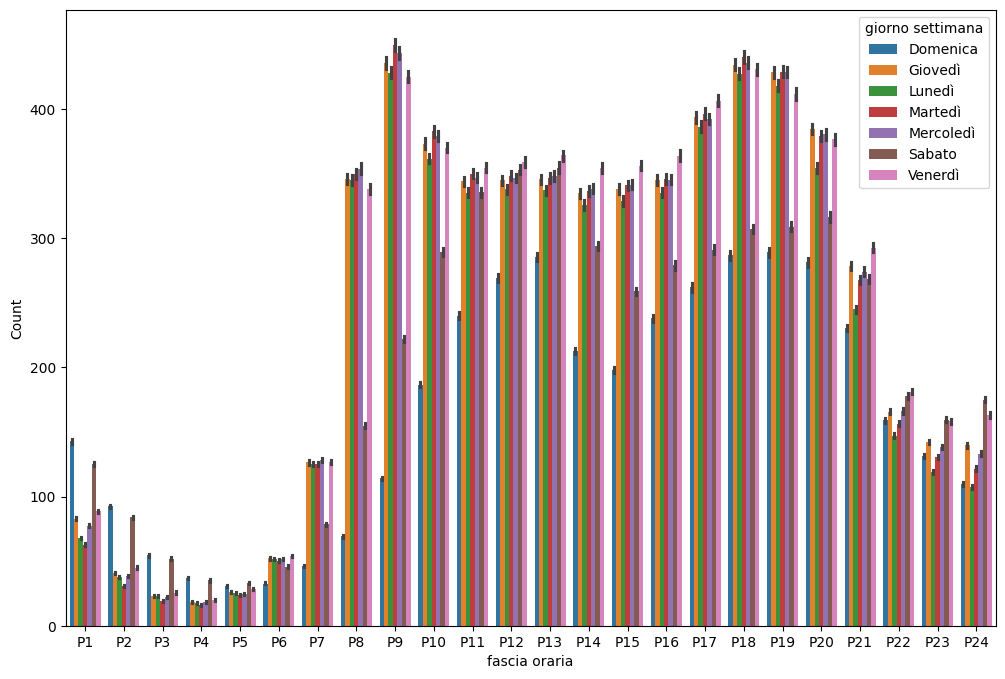

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_df1, x='fascia oraria', y='Count', hue="giorno settimana")

# Analisi geospaziale del flusso veicolare

In [26]:
import geopandas as gpd
import mapclassify
import folium

In [49]:
df.head()

,codice spira,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,ordinanza,stato,codimpsem,direzione,angolo,longitudine,latitudine,geopoint,ID_univoco_stazione_spira,giorno settimana
data,,,,,,,,,,,,,,,,,,,,,
2024-01-01,0.127 3.87 2 1,33,71,44,35,21,21,12,6,12,...,4000/343434,A,150,S,171,11.350739,44.508560,"44.508560104800296, 11.350739242428771",200,Lunedì
2024-01-01,4.11 4.10 6 1,4,4,4,11,8,5,6,10,11,...,4000/343434,A,167,SE,244,11.395332,44.475595,"44.4755950444838, 11.3953316746088",694,Lunedì
2024-01-01,4.12 4.11 6 1,316,560,436,287,187,99,98,81,117,...,4000/343434,A,346,E,244,11.392769,44.476535,"44.4765349090045, 11.3927690769774",696,Lunedì
2024-01-01,4.13 4.89 6 1,38,59,64,42,24,29,22,26,25,...,4000/343434,A,383,SE,209,11.383614,44.479783,"44.4797825791667, 11.3836137088963",708,Lunedì
2024-01-01,4.13 4.91 8 1,0,0,0,0,0,0,0,0,0,...,4000/343434,A,382,SO,145,11.382163,44.480519,"44.4805190361487, 11.3821631059497",709,Lunedì


In [50]:
#filtro colonne utili per la rappresentazione su mappa
data=df.filter(['id_uni','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24', 'longitudine', 'latitudine', 'Nome via'])
data.head()

,id_uni,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P18,P19,P20,P21,P22,P23,P24,longitudine,latitudine,Nome via
data,,,,,,,,,,,,,,,,,,,,,
2024-01-01,851,33,71,44,35,21,21,12,6,12,...,100,90,64,54,39,29,14,11.350739,44.508560,VIA VITTORIO BIGARI
2024-01-01,724,4,4,4,11,8,5,6,10,11,...,29,21,23,105,7,10,9,11.395332,44.475595,VIA GIUSEPPE DOZZA
2024-01-01,602,316,560,436,287,187,99,98,81,117,...,677,626,594,432,313,251,194,11.392769,44.476535,VIA GIUSEPPE DOZZA
2024-01-01,668,38,59,64,42,24,29,22,26,25,...,82,89,93,62,51,43,34,11.383614,44.479783,VIA BELLARIA
2024-01-01,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11.382163,44.480519,VIA PO


In [53]:
# con il metodo groupby raggruppo i dati per id univoco della spira facendone una media dopo un ulteriore raggruppamento secondo fascia oraria
# per le colonne in cui viene utilizzata la funzione first invece si prende il primo valore di ciascun gruppo
grouped = data.groupby(['id_uni']).agg({
  'P1': 'mean', 'P2': 'mean','P3': 'mean','P4': 'mean','P5': 'mean','P6': 'mean','P7': 'mean','P8': 'mean','P9': 'mean','P10': 'mean',
  'P11': 'mean','P12': 'mean','P13': 'mean','P14': 'mean','P15': 'mean','P16': 'mean','P17': 'mean','P18': 'mean','P19': 'mean','P20': 'mean',
  'P21': 'mean','P22': 'mean','P23': 'mean','P24': 'mean', 'longitudine' : 'first', 'latitudine' : 'first', 'Nome via' : 'first'
})
grouped.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P18,P19,P20,P21,P22,P23,P24,longitudine,latitudine,Nome via
id_uni,,,,,,,,,,,,,,,,,,,,,
1,145.197080,80.653285,52.791971,45.259124,74.291971,119.503650,179.244526,447.828467,573.992701,563.591241,...,660.773723,658.080292,564.029197,424.507299,271.638686,225.828467,202.963504,11.348570,44.523315,VIA DI CORTICELLA
2,42.266423,29.452555,19.992701,22.328467,36.766423,42.229927,55.255474,132.164234,172.000000,143.197080,...,155.076642,147.784672,121.189781,95.978102,58.310219,48.660584,50.631387,11.347814,44.516989,VIA DI CORTICELLA
5,99.346715,55.222628,30.390511,18.704380,16.357664,24.970803,65.678832,202.927007,317.591241,329.113139,...,411.945255,415.547445,401.967153,284.664234,155.857664,135.321168,140.886861,11.366615,44.486524,VIA MAZZINI
6,152.244526,86.507299,45.339416,29.040146,28.810219,45.631387,133.802920,385.062044,533.434307,492.171533,...,555.843066,529.394161,499.361314,376.594891,223.160584,208.799270,222.200730,11.357087,44.485009,VIALE GIOSUE' CARDUCCI
7,304.229927,208.266423,175.346715,132.262774,117.791971,142.018248,248.222628,722.040146,818.850365,704.627737,...,1194.850365,1129.532847,1021.218978,779.281022,504.094891,445.018248,423.507299,11.357787,44.485616,VIALE GIOSUE' CARDUCCI


In [54]:
#tolgo id_uni come indice e lo faccio diventare semplice colonna
grouped.reset_index(drop=False, inplace = True)

In [55]:
# converto valori float in integer per etichette mappa
grouped = grouped.astype({'P1': 'int', 'P2': 'int','P3': 'int','P4': 'int','P5': 'int','P6': 'int','P7': 'int','P8': 'int','P9': 'int','P10': 'int','P11': 'int','P12': 'int','P13': 'int','P14': 'int','P15': 'int','P16': 'int','P17': 'int','P18': 'int','P19': 'int','P20': 'int','P21': 'int','P22': 'int','P23': 'int','P24': 'int'})

In [56]:
#filtro i dati per quattro fasce orarie indicative (8,12,18,23)
df8 = grouped.filter(['latitudine', 'longitudine', 'id_uni','Nome via', 'P8'])
df12 = grouped.filter(['latitudine', 'longitudine', 'id_uni','Nome via', 'P12'])
df18 = grouped.filter(['latitudine', 'longitudine', 'id_uni','Nome via', 'P18'])
df23 = grouped.filter(['latitudine', 'longitudine', 'id_uni','Nome via', 'P23'])

In [57]:
#creo i rispettivi geodataframes
geodf8 = gpd.GeoDataFrame(df8, geometry=gpd.points_from_xy(df8.longitudine, df8.latitudine), crs="EPSG:4326")
geodf12 = gpd.GeoDataFrame(df12, geometry=gpd.points_from_xy(df12.longitudine, df12.latitudine), crs="EPSG:4326")
geodf18 = gpd.GeoDataFrame(df18, geometry=gpd.points_from_xy(df18.longitudine, df18.latitudine), crs="EPSG:4326")
geodf23 = gpd.GeoDataFrame(df23, geometry=gpd.points_from_xy(df23.longitudine, df23.latitudine), crs="EPSG:4326")

Aggiunta delle tre centraline alla mappa

In [60]:
from shapely.geometry import Point

In [61]:
centraline = {'centralina': ['PORTA SAN FELICE', 'VIA CHIARINI', 'GIARDINI MARGHERITA'],
        'latitude': [44.49929154966789, 44.49975795208328,  44.48292276022178],  # latitudini
        'longitude': [11.327111366502287, 11.28724516781733, 11.353113005676569]}  # longitudini

In [ ]:
# Creo una lista di oggetti point, ciascuno è una coppia di coordinate 
geometry = [Point(xy) for xy in zip(centraline['longitude'], centraline['latitude'])]

In [63]:
#uso la lista geometria creata al punto precedente come colonna della geometria per creare un geodaframe 
gdf_centraline = gpd.GeoDataFrame(centraline, geometry=geometry)

In [64]:
# imposto il sistema di riferimento delle coordinate da (CRS) a WGS84 (lat/lon)
gdf_centraline.set_crs("EPSG:4326", inplace=True)

,centralina,latitude,longitude,geometry
0,PORTA SAN FELICE,44.499292,11.327111,POINT (11.32711 44.49929)
1,VIA CHIARINI,44.499758,11.287245,POINT (11.28725 44.49976)
2,GIARDINI MARGHERITA,44.482923,11.353113,POINT (11.35311 44.48292)


In [ ]:
#importo le classi becessarie per creare marker personalizzati sulla mappa
from folium import Icon, CustomIcon

In [65]:
m = folium.Map(location=[44.496049443822876, 11.340501730411939], zoom_start=12)

#geodf.explore( m=m, name="spire", color="red", marker_kwds=dict(radius=0.5, fill=True), )
geodf8.explore(m=m, name="8:00-9:00 green", color="green", style_kwds={"style_function":lambda x: {"radius":x["properties"]["P8"]/100}} )
geodf12.explore(m=m, name="12:00-13:00 red", color="red", style_kwds={"style_function":lambda x: {"radius":x["properties"]["P12"]/100}} )
geodf18.explore(m=m, name="18:00-17:00 pink", color="pink", style_kwds={"style_function":lambda x: {"radius":x["properties"]["P18"]/100}} )
geodf23.explore(m=m, name="23:00-24:00 purple",color="purple", style_kwds={"style_function":lambda x: {"radius":x["properties"]["P23"]/100}} )

# Iterare su ogni riga del GeoDataFrame (gdf_centraline) e aggiungere un marker con l'icona della casetta azzurra
for idx, row in gdf_centraline.iterrows():
    popup_text = f"Centralina: {row['centralina']}"
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],  # Le coordinate delle centraline
        icon=folium.Icon(color='blue', icon='home', icon_color='white'),  # Icona casetta azzurra
        popup= popup_text,
    ).add_to(m)

folium.TileLayer("CartoDB positron", show=False).add_to(m)

folium.LayerControl().add_to(m)

m

# Integrazione con Altri Dataset e Analisi delle Correlazioni

In [94]:
data = pd.read_csv('centraline-qualita-aria.csv',delimiter=";",index_col=0, parse_dates=True)

C:\Users\giuli\AppData\Local\Temp\ipykernel_25620\3505786173.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('centraline-qualita-aria.csv',delimiter=";",index_col=0, parse_dates=True)


In [95]:
data.head()

,reftime,stazione,value,agente_atm
_id,,,,
629415,2024-08-14T06:00:00+02:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",0.2,C6H6 (Benzene)
629419,2024-08-14T10:00:00+02:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",0.3,C6H6 (Benzene)
629422,2024-08-14T13:00:00+02:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",0.2,C6H6 (Benzene)
629426,2024-08-14T17:00:00+02:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",0.2,C6H6 (Benzene)
629427,2024-08-14T18:00:00+02:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",0.6,C6H6 (Benzene)


In [96]:
#quanti (8) e quali sono gli inquinanti oggetto della rilevazione
inquinanti = data['agente_atm'].unique()
inquinanti

array(['C6H6 (Benzene)', 'NO (Monossido di azoto)', 'O3 (Ozono)',
       'NO2 (Biossido di azoto)', 'PM2.5', 'PM10',
       'NOX (Ossidi di azoto)', 'CO (Monossido di carbonio)'],
      dtype=object)

In [97]:
#quante e quali sono le centaline coinvolte nella rilevazione
centraline = data['stazione'].unique()
centraline

array(['PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN FELICE',
       'VIA CHIARINI, BOLOGNA VIA CHIARINI',
       'GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI'], dtype=object)

In [98]:
# converto colonna 'reftime' in formato data ora
data["reftime"] = pd.to_datetime(data["reftime"], utc=True)

In [99]:
data.head()

,reftime,stazione,value,agente_atm
_id,,,,
629415,2024-08-14 04:00:00+00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",0.2,C6H6 (Benzene)
629419,2024-08-14 08:00:00+00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",0.3,C6H6 (Benzene)
629422,2024-08-14 11:00:00+00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",0.2,C6H6 (Benzene)
629426,2024-08-14 15:00:00+00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",0.2,C6H6 (Benzene)
629427,2024-08-14 16:00:00+00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",0.6,C6H6 (Benzene)


In [100]:
#rimuovo indice e formatto correttamente la data
data.reset_index(drop=False, inplace = True)

#rimuovo il fuso orario
data['reftime'] = data['reftime'].dt.tz_localize(None)
data.head()

,_id,reftime,stazione,value,agente_atm
0,629415,2024-08-14 04:00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",0.2,C6H6 (Benzene)
1,629419,2024-08-14 08:00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",0.3,C6H6 (Benzene)
2,629422,2024-08-14 11:00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",0.2,C6H6 (Benzene)
3,629426,2024-08-14 15:00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",0.2,C6H6 (Benzene)
4,629427,2024-08-14 16:00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",0.6,C6H6 (Benzene)


In [101]:
#individuo intervallo di tempo durante il quale sono stati rilevati i dati
data["reftime"].min(), data["reftime"].max()

(Timestamp('2023-12-31 23:00:00'), Timestamp('2024-10-02 22:00:00'))

In [102]:
#raggruppo le rilevazioni per data (giorno) e per agente inquinante facendo una media dei valori rilevati
data_grouped = data.groupby([data["reftime"].dt.date, "agente_atm"])["value"].mean()

data_grouped

reftime     agente_atm                
2023-12-31  C6H6 (Benzene)                 1.600000
            CO (Monossido di carbonio)     0.600000
            NO (Monossido di azoto)       27.000000
            NO2 (Biossido di azoto)       22.333333
            NOX (Ossidi di azoto)         72.000000
                                            ...    
2024-09-30  PM2.5                          5.500000
2024-10-01  NO (Monossido di azoto)       13.375000
            O3 (Ozono)                    33.166667
            PM2.5                          8.000000
2024-10-02  O3 (Ozono)                    34.173913
Name: value, Length: 2190, dtype: float64

In [103]:
data_grouped_df = data_grouped.reset_index()
data_grouped_df

,reftime,agente_atm,value
0,2023-12-31,C6H6 (Benzene),1.600000
1,2023-12-31,CO (Monossido di carbonio),0.600000
2,2023-12-31,NO (Monossido di azoto),27.000000
3,2023-12-31,NO2 (Biossido di azoto),22.333333
4,2023-12-31,NOX (Ossidi di azoto),72.000000
...,...,...,...
2185,2024-09-30,PM2.5,5.500000
2186,2024-10-01,NO (Monossido di azoto),13.375000
2187,2024-10-01,O3 (Ozono),33.166667
2188,2024-10-01,PM2.5,8.000000


In [104]:
pm1 = pd.pivot_table(data_grouped_df,index=['reftime'], columns = 'agente_atm', values = "value")
pm1.head()

agente_atm,C6H6 (Benzene),CO (Monossido di carbonio),NO (Monossido di azoto),NO2 (Biossido di azoto),NOX (Ossidi di azoto),O3 (Ozono),PM10,PM2.5
reftime,,,,,,,,
2023-12-31,1.600000,0.600000,27.000000,22.333333,72.000000,19.000000,49.666667,43.5
2024-01-01,1.369565,0.558333,20.083333,22.069444,59.125000,14.250000,21.666667,19.5
2024-01-02,1.569565,0.658333,42.500000,25.638889,94.916667,3.645833,22.000000,18.5
2024-01-03,1.721739,0.754167,46.875000,30.902778,111.041667,6.291667,29.333333,24.5
2024-01-04,1.834783,0.791667,57.291667,32.125000,130.333333,18.333333,26.333333,19.5


In [105]:
# Rimuovo tutte le righe che contengono NaN
pm1.dropna()  

agente_atm,C6H6 (Benzene),CO (Monossido di carbonio),NO (Monossido di azoto),NO2 (Biossido di azoto),NOX (Ossidi di azoto),O3 (Ozono),PM10,PM2.5
reftime,,,,,,,,
2023-12-31,1.600000,0.600000,27.000000,22.333333,72.000000,19.000000,49.666667,43.5
2024-01-01,1.369565,0.558333,20.083333,22.069444,59.125000,14.250000,21.666667,19.5
2024-01-02,1.569565,0.658333,42.500000,25.638889,94.916667,3.645833,22.000000,18.5
2024-01-03,1.721739,0.754167,46.875000,30.902778,111.041667,6.291667,29.333333,24.5
2024-01-04,1.834783,0.791667,57.291667,32.125000,130.333333,18.333333,26.333333,19.5
...,...,...,...,...,...,...,...,...
2024-09-23,0.939130,0.420833,18.458333,14.380282,41.666667,24.250000,26.000000,16.5
2024-09-24,0.930435,0.412500,15.875000,14.395833,40.250000,45.520833,12.333333,9.0
2024-09-25,0.834783,0.400000,15.166667,14.106383,38.458333,48.319149,13.000000,6.0


array([<Axes: xlabel='reftime'>, <Axes: xlabel='reftime'>,
       <Axes: xlabel='reftime'>, <Axes: xlabel='reftime'>,
       <Axes: xlabel='reftime'>, <Axes: xlabel='reftime'>,
       <Axes: xlabel='reftime'>, <Axes: xlabel='reftime'>], dtype=object)

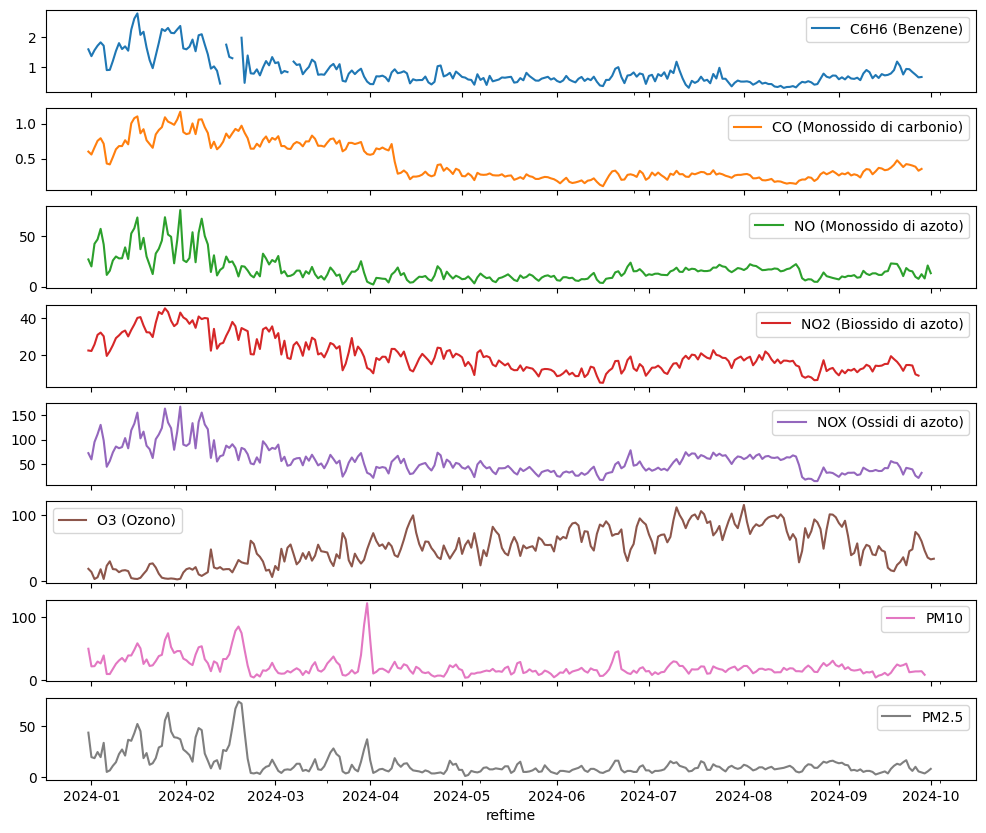

In [106]:
pm1.plot(subplots=True, figsize=(12,10))

Analizzo nello specifico l'inquinante pm 2.5 le cui emissioni derivano principalmente dalla combustione di carburanti fossili nei veicoli a motore.

In [107]:
data1 = data.loc[(data['agente_atm'] == 'PM2.5')]
data1["reftime"] = pd.to_datetime(data1["reftime"], utc=True)

data1

C:\Users\giuli\AppData\Local\Temp\ipykernel_25620\670345364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["reftime"] = pd.to_datetime(data1["reftime"], utc=True)


,_id,reftime,stazione,value,agente_atm
125,634583,2024-08-19 22:00:00+00:00,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI",5.0,PM2.5
192,638411,2024-08-20 22:00:00+00:00,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI",7.0,PM2.5
387,648782,2024-08-23 22:00:00+00:00,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI",13.0,PM2.5
425,648783,2024-08-22 22:00:00+00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",12.0,PM2.5
617,699971,2024-09-05 22:00:00+00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",6.0,PM2.5
...,...,...,...,...,...
58796,628848,2024-08-17 22:00:00+00:00,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI",10.0,PM2.5
58865,628852,2024-08-18 22:00:00+00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",4.0,PM2.5
59140,700573,2024-09-05 22:00:00+00:00,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI",7.0,PM2.5
59266,754102,2024-09-21 22:00:00+00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",11.0,PM2.5


In [ ]:
# Rimuovo il fuso orario
data1['reftime'] = data1['reftime'].dt.tz_localize(None)

C:\Users\giuli\AppData\Local\Temp\ipykernel_25620\2234537759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['reftime'] = data1['reftime'].dt.tz_localize(None)


In [109]:
#modifico nume della colonna reftime per preparare df a successivo merge
data1.rename(columns={'reftime': 'data'}, inplace=True)
data1.head()

C:\Users\giuli\AppData\Local\Temp\ipykernel_25620\3201272696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns={'reftime': 'data'}, inplace=True)


,_id,data,stazione,value,agente_atm
125,634583,2024-08-19 22:00:00,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI",5.0,PM2.5
192,638411,2024-08-20 22:00:00,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI",7.0,PM2.5
387,648782,2024-08-23 22:00:00,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI",13.0,PM2.5
425,648783,2024-08-22 22:00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",12.0,PM2.5
617,699971,2024-09-05 22:00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",6.0,PM2.5


In [110]:
pm = pd.pivot_table(data1,index=['data'], columns = 'stazione', values = "value")
pm

stazione,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI","PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN FELICE"
data,,
2023-12-31 23:00:00,48.0,39.0
2024-01-01 23:00:00,20.0,19.0
2024-01-02 23:00:00,20.0,17.0
2024-01-03 23:00:00,26.0,23.0
2024-01-04 23:00:00,18.0,21.0
...,...,...
2024-09-27 22:00:00,6.0,5.0
2024-09-28 22:00:00,4.0,5.0
2024-09-29 22:00:00,2.0,5.0


<Axes: xlabel='data'>

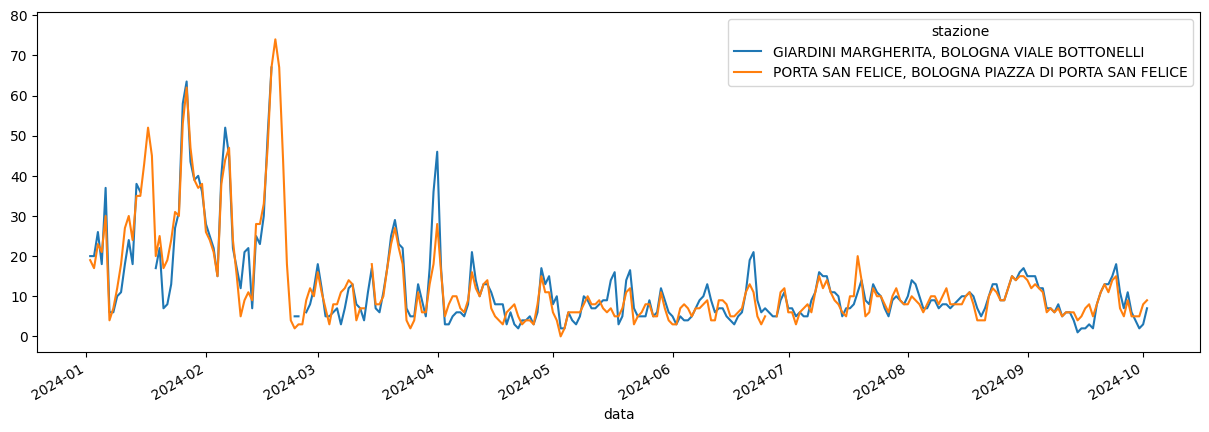

In [111]:
pm["2024-01-01":"2024-10-01"].plot(figsize=(15, 5))

In [112]:
data1.head()

,_id,data,stazione,value,agente_atm
125,634583,2024-08-19 22:00:00,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI",5.0,PM2.5
192,638411,2024-08-20 22:00:00,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI",7.0,PM2.5
387,648782,2024-08-23 22:00:00,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI",13.0,PM2.5
425,648783,2024-08-22 22:00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",12.0,PM2.5
617,699971,2024-09-05 22:00:00,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",6.0,PM2.5


In [ ]:
# Converto la colonna 'data' di datat1 in formato datetime e estraggo solo la data
data1['data'] = pd.to_datetime(data1['data']).dt.date

data1.head()

C:\Users\giuli\AppData\Local\Temp\ipykernel_25620\2920212257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['data'] = pd.to_datetime(data1['data']).dt.date


,_id,data,stazione,value,agente_atm
125,634583,2024-08-19,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI",5.0,PM2.5
192,638411,2024-08-20,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI",7.0,PM2.5
387,648782,2024-08-23,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI",13.0,PM2.5
425,648783,2024-08-22,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",12.0,PM2.5
617,699971,2024-09-05,"PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN ...",6.0,PM2.5


In [114]:
pm = pd.pivot_table(data1,index=['data'], columns = 'stazione', values = "value")
pm.head()

stazione,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI","PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN FELICE"
data,,
2023-12-31,48.0,39.0
2024-01-01,20.0,19.0
2024-01-02,20.0,17.0
2024-01-03,26.0,23.0
2024-01-04,18.0,21.0


In [115]:
# Calcolare la media delle due misurazioni di PM2.5
pm['pm2.5_media'] = pm[['GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI',  'PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN FELICE']].mean(axis=1)

pm

stazione,"GIARDINI MARGHERITA, BOLOGNA VIALE BOTTONELLI","PORTA SAN FELICE, BOLOGNA PIAZZA DI PORTA SAN FELICE",pm2.5_media
data,,,
2023-12-31,48.0,39.0,43.5
2024-01-01,20.0,19.0,19.5
2024-01-02,20.0,17.0,18.5
2024-01-03,26.0,23.0,24.5
2024-01-04,18.0,21.0,19.5
...,...,...,...
2024-09-27,6.0,5.0,5.5
2024-09-28,4.0,5.0,4.5
2024-09-29,2.0,5.0,3.5


In [116]:
# Creare un nuovo DataFrame con solo le colonne desiderate
df_selezionato = pm[['pm2.5_media']]
df_selezionato

stazione,pm2.5_media
data,
2023-12-31,43.5
2024-01-01,19.5
2024-01-02,18.5
2024-01-03,24.5
2024-01-04,19.5
...,...
2024-09-27,5.5
2024-09-28,4.5
2024-09-29,3.5


In [117]:
# Rimuovo l'indice e lo trasformo in una colonna
df_selezionato = df_selezionato.reset_index()
df_selezionato

stazione,data,pm2.5_media
0,2023-12-31,43.5
1,2024-01-01,19.5
2,2024-01-02,18.5
3,2024-01-03,24.5
4,2024-01-04,19.5
...,...,...
271,2024-09-27,5.5
272,2024-09-28,4.5
273,2024-09-29,3.5
274,2024-09-30,5.5


In [118]:
df_selezionato.columns

Index(['data', 'pm2.5_media'], dtype='object', name='stazione')

In [261]:
df.head()

,data,codice spira,00:00-01:00,01:00-02:00,02:00-03:00,03:00-04:00,04:00-05:00,05:00-06:00,06:00-07:00,07:00-08:00,...,ordinanza,stato,codimpsem,direzione,angolo,longitudine,latitudine,geopoint,ID_univoco_stazione_spira,giorno settimana
0,2024-05-01,0.127 1.3 2 1,42,12,0,3,2,8,6,8,...,4000/343434,A,315,S,156,11.349221,44.500360,"44.5003601607765, 11.3492210523335",14,3
1,2024-05-01,0.127 1.14 4 1,9,8,3,2,2,3,6,19,...,4000/343434,A,92,E,264,11.339836,44.490116,"44.4901162203284, 11.3398356513878",5,3
2,2024-05-01,0.127 1.15 6 1,52,51,34,17,11,11,15,20,...,4000/343434,A,324,S,168,11.343443,44.490027,"44.4900271601578, 11.3434427397635",7,3
3,2024-05-01,0.127 1.16 2 1,0,3,5,2,3,16,9,3,...,4000/343434,A,117,NO,352,11.351981,44.494104,"44.4941035248986, 11.3519809631422",8,3
4,2024-05-01,0.127 1.17 4 1,23,25,10,4,6,10,10,10,...,4000/343434,A,325,NE,333,11.350903,44.492369,"44.4923692879684, 11.3509026754331",10,3


In [262]:
# Suppongo che 'df_hourly_avg' contenga la colonna 'data' e le fasce orarie (ad esempio, '00:00-01:00', '01:00-02:00', ...).
# Mi assicuro che la colonna 'data' sia nel formato datetime (se non lo è già)
df['data'] = pd.to_datetime(df['data'])

# Calcolo la media del flusso veicolare per ogni giorno (media di tutte le fasce orarie)
# Uso tutte le colonne che rappresentano le fasce orarie per calcolare la media
orari_columns = ['00:00-01:00', '01:00-02:00', '02:00-03:00', '03:00-04:00', '04:00-05:00', '05:00-06:00', 
                 '06:00-07:00', '07:00-08:00', '08:00-09:00', '09:00-10:00', '10:00-11:00', '11:00-12:00', 
                 '12:00-13:00', '13:00-14:00', '14:00-15:00', '15:00-16:00', '16:00-17:00', '17:00-18:00', 
                 '18:00-19:00', '19:00-20:00', '20:00-21:00', '21:00-22:00', '22:00-23:00', '23:00-24:00']

# Calcolo la media per ogni giorno, considerando tutte le fasce orarie
df_avg_flusso = df[orari_columns].mean(axis=1)

# Creo un nuovo DataFrame con la data e il flusso veicolare medio
df_result = pd.DataFrame({
    'data': df['data'],
    'flusso_veicolare_medio': df_avg_flusso
})

# Visualizzo il nuovo DataFrame
print(df_result.head())

        data  flusso_veicolare_medio
0 2024-05-01               31.166667
1 2024-05-01               24.291667
2 2024-05-01               47.083333
3 2024-05-01                4.416667
4 2024-05-01               40.541667


In [263]:
# Per ogni giorno, calcolo la media (o somma) dei flussi veicolari di tutte le spire

df_aggregated = df_result.groupby('data').agg({'flusso_veicolare_medio': 'mean'}).reset_index()

# Ora df_aggregated avrà una sola riga per ogni data, con il flusso veicolare medio aggregato
print(df_aggregated.head())


        data  flusso_veicolare_medio
0 2024-01-01              138.285533
1 2024-01-02              187.783927
2 2024-01-03              203.978047
3 2024-01-04              210.139067
4 2024-01-05              224.490508


Merge dei due dataframe ( traffico e pm2.5)

In [264]:
df_aggregated.dtypes

data                      datetime64[ns]
flusso_veicolare_medio           float64
dtype: object

In [265]:
df_selezionato.dtypes

stazione
data           datetime64[ns]
pm2.5_media           float64
dtype: object

In [266]:
# Converto la colonna 'data' in tipo datetime
df_selezionato['data'] = pd.to_datetime(df_selezionato['data'])

In [267]:
# Eseguo il merge sui DataFrame basato sulla colonna 'data'
df_merged = pd.merge(df_aggregated, df_selezionato, on='data', how='inner')
df_merged

,data,flusso_veicolare_medio,pm2.5_media
0,2024-01-01,138.285533,19.5
1,2024-01-02,187.783927,18.5
2,2024-01-03,203.978047,24.5
3,2024-01-04,210.139067,19.5
4,2024-01-05,224.490508,33.5
...,...,...,...
269,2024-09-26,252.002959,10.0
270,2024-09-27,256.655819,5.5
271,2024-09-28,219.803107,4.5
272,2024-09-29,174.935256,3.5


In [268]:
df_merged[['flusso_veicolare_medio', 'pm2.5_media']].corr()

,flusso_veicolare_medio,pm2.5_media
flusso_veicolare_medio,1.000000,0.092064
pm2.5_media,0.092064,1.000000


Il coefficiente di correlazione di Pearson misura la forza e la direzione della relazione lineare tra due variabili. Nel caso delle variabili appena analizzate il valore del coefficiente (0.092064) è prossimo a zero, indicando una correlazione molto debole tra il flusso veicolare medio e la concentrazione di PM2.5. Questo potrebbe essere dovuto alla mancanza di altre variabili significative che influenzano i livelli di PM2.5, come le condizioni meteorologiche (pressione, temperatura, vento, precipitazioni), le emissioni derivanti da riscaldamento domestico o le attività industriali. Questi fattori potrebbero contribuire alla variazione della concentrazione di PM2.5 in modo più significativo rispetto al traffico veicolare. Inoltre, è possibile che la relazione tra traffico e PM2.5 non sia di tipo lineare, e quindi non venga catturata da un semplice coefficiente di correlazione lineare. Un'analisi più approfondita che includa queste variabili, o l'applicazione di modelli non lineari, potrebbe rivelare una relazione più complessa che non appare in questa prima analisi.

In [269]:
df_merged.head()

,data,flusso_veicolare_medio,pm2.5_media
0,2024-01-01,138.285533,19.5
1,2024-01-02,187.783927,18.5
2,2024-01-03,203.978047,24.5
3,2024-01-04,210.139067,19.5
4,2024-01-05,224.490508,33.5


In [270]:
df_merged['giorno_della_settimana'] = df_merged['data'].dt.weekday  # Lunedì=0, Domenica=6
df_merged

,data,flusso_veicolare_medio,pm2.5_media,giorno_della_settimana
0,2024-01-01,138.285533,19.5,0
1,2024-01-02,187.783927,18.5,1
2,2024-01-03,203.978047,24.5,2
3,2024-01-04,210.139067,19.5,3
4,2024-01-05,224.490508,33.5,4
...,...,...,...,...
269,2024-09-26,252.002959,10.0,3
270,2024-09-27,256.655819,5.5,4
271,2024-09-28,219.803107,4.5,5
272,2024-09-29,174.935256,3.5,6


In [271]:
#tolgo la colonna 'data'
df_merged.drop('data', axis=1, inplace=True)
df_merged.head()


,flusso_veicolare_medio,pm2.5_media,giorno_della_settimana
0,138.285533,19.5,0
1,187.783927,18.5,1
2,203.978047,24.5,2
3,210.139067,19.5,3
4,224.490508,33.5,4


<Axes: >

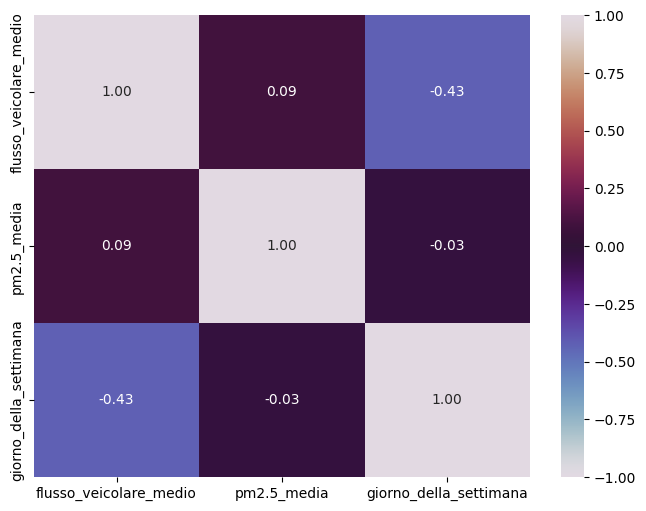

In [280]:
# Calcolare la matrice di correlazione
correlation_matrix = df_merged.corr()

# Creare la heatmap
plt.figure(figsize=(8, 6))  # Impostare la dimensione della figura (opzionale)
sns.heatmap(correlation_matrix, annot=True, cmap='twilight', fmt='.2f', vmin=-1, vmax=1)


Osservando la matrice di correlazione si nota una correlazione negativa e moderata tra giorno della settimana e flusso veicolare medio. Questo suggerisce che mentre i giorni della settimana aumentano passando dal lunedì alla domenica, il flusso veicolare diminuisce e questo si spiega bene con una riduzione delle attività lavorative e di studio durante il fine settimana.

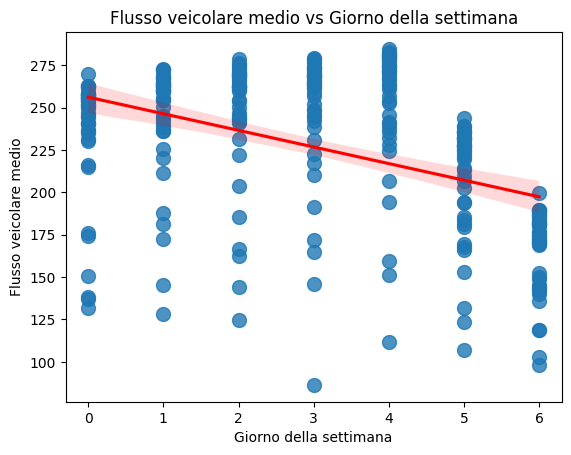

In [282]:
# Scatter plot con retta di regressione
sns.regplot(x='giorno_della_settimana', y='flusso_veicolare_medio', data=df_merged, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title("Flusso veicolare medio vs Giorno della settimana")
plt.xlabel("Giorno della settimana")
plt.ylabel("Flusso veicolare medio")
plt.show()


# Modellazione Predittiva del Traffico con Reti Neurali LSTM

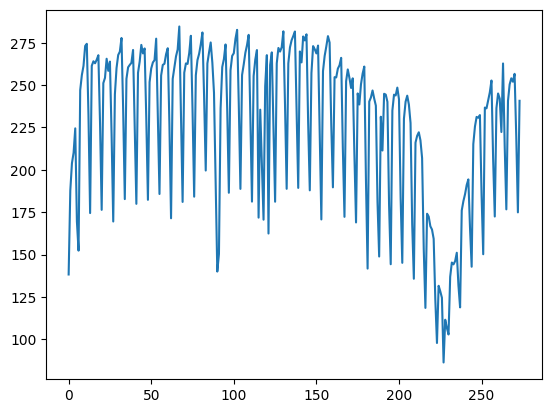

In [230]:
# grafico del flusso del traffico da 2024-01-01 a 2024-10-01
plt.plot(df_aggregated['flusso_veicolare_medio'])

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import OneHotEncoder

In [232]:
df.replace({'Lunedì': "1", 'Martedì': "2", 'Mercoledì': "3", 'Giovedì': "4", 'Venerdì': "5", 'Sabato': "6", 'Domenica': "7"}, inplace=True)
df.head()

,data,codice spira,00:00-01:00,01:00-02:00,02:00-03:00,03:00-04:00,04:00-05:00,05:00-06:00,06:00-07:00,07:00-08:00,...,ordinanza,stato,codimpsem,direzione,angolo,longitudine,latitudine,geopoint,ID_univoco_stazione_spira,giorno settimana
0,2024-05-01,0.127 1.3 2 1,42,12,0,3,2,8,6,8,...,4000/343434,A,315,S,156,11.349221,44.500360,"44.5003601607765, 11.3492210523335",14,3
1,2024-05-01,0.127 1.14 4 1,9,8,3,2,2,3,6,19,...,4000/343434,A,92,E,264,11.339836,44.490116,"44.4901162203284, 11.3398356513878",5,3
2,2024-05-01,0.127 1.15 6 1,52,51,34,17,11,11,15,20,...,4000/343434,A,324,S,168,11.343443,44.490027,"44.4900271601578, 11.3434427397635",7,3
3,2024-05-01,0.127 1.16 2 1,0,3,5,2,3,16,9,3,...,4000/343434,A,117,NO,352,11.351981,44.494104,"44.4941035248986, 11.3519809631422",8,3
4,2024-05-01,0.127 1.17 4 1,23,25,10,4,6,10,10,10,...,4000/343434,A,325,NE,333,11.350903,44.492369,"44.4923692879684, 11.3509026754331",10,3


In [233]:
#aggrego i dati per fascia e giorno
#ne faccio la media per combinazione
hourly_columns = df.columns[2:26]
data_melted = df.melt(id_vars=['giorno settimana'], value_vars=hourly_columns, var_name='fascia oraria', value_name='flusso veicolare')
grouped_data = data_melted.groupby(['giorno settimana', 'fascia oraria']).agg({'flusso veicolare': 'mean'}).reset_index()
grouped_data

,giorno settimana,fascia oraria,flusso veicolare
0,1,00:00-01:00,66.817497
1,1,01:00-02:00,37.223544
2,1,02:00-03:00,22.529379
3,1,03:00-04:00,17.535756
4,1,04:00-05:00,24.893114
...,...,...,...
163,7,19:00-20:00,278.573012
164,7,20:00-21:00,228.322914
165,7,21:00-22:00,157.432016
166,7,22:00-23:00,129.882417


In [234]:
# Converto le variabili categoriche in variabili numeriche (One Hot Encoding)
# 'giorno della settimana' (supponendo che i giorni siano numerati da 0 a 6)
grouped_data['giorno della settimana'] = grouped_data['giorno settimana'].astype('category').cat.codes
# 'fascia oraria' (ad esempio, ogni fascia oraria rappresenta un intervallo di tempo, come '00-01', '01-02', ecc.)
grouped_data['fascia oraria'] = grouped_data['fascia oraria'].astype('category').cat.codes
grouped_data.head()

,giorno settimana,fascia oraria,flusso veicolare,giorno della settimana
0,1,0,66.817497,0
1,1,1,37.223544,0
2,1,2,22.529379,0
3,1,3,17.535756,0
4,1,4,24.893114,0


In [235]:
# Normalizzo il flusso veicolare
grouped_data['flusso veicolare'] = grouped_data['flusso veicolare'].astype(float)

In [236]:
# Esamino il dataset
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   giorno settimana        168 non-null    object 
 1   fascia oraria           168 non-null    int8   
 2   flusso veicolare        168 non-null    float64
 3   giorno della settimana  168 non-null    int8   
dtypes: float64(1), int8(2), object(1)
memory usage: 3.1+ KB


In [237]:
# Converto le variabili in un formato che si possa usare per LSTM
grouped_data = grouped_data[['giorno settimana', 'fascia oraria', 'flusso veicolare']]

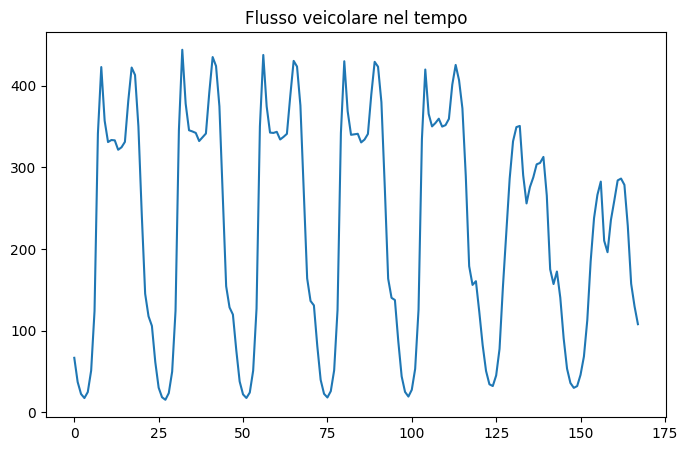

In [238]:
# Visualizza il grafico del flusso veicolare
grouped_data['flusso veicolare'].plot(figsize=(8,5))
plt.title('Flusso veicolare nel tempo')
plt.show()

In [216]:
grouped_data = grouped_data.reset_index(drop=True)

In [217]:
def input_label_split(data, time_steps=7):
    inputs, labels = [], []
    for i in range(len(data) - time_steps):
        inputs.append(data.iloc[i:i+time_steps, :-1].values)  # Prevediamo il flusso veicolare, quindi escludiamo l'ultima colonna ('flusso veicolare')
        labels.append(data.iloc[i+time_steps, -1])  # Target: flusso veicolare del giorno successivo
    return np.array(inputs), np.array(labels)

In [218]:
# Preparare i dati
X, y = input_label_split(grouped_data, time_steps=7)

In [219]:
# Visualizzare il formato
X[0], y[0]

(array([['1', 0],
        ['1', 1],
        ['1', 2],
        ['1', 3],
        ['1', 4],
        ['1', 5],
        ['1', 6]], dtype=object),
 np.float64(341.4033896303295))

In [220]:
# Split dei dati in training e testing
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [221]:
# Controllare che X_train contenga solo valori numerici (senza etichette o variabili categoriche)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [205]:
# Normalizzazione dei dati
train_mean = X_train.mean()
train_std = X_train.std()
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std

X_train.shape, y_train.shape

((128, 7, 2), (128,))

In [222]:
# Definire il modello LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)  # Prevediamo solo una variabile: il flusso veicolare
])

c:\Users\giuli\Desktop\Big Data\progetto\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [223]:
# Compilare il modello
model.compile(optimizer='adam', loss='mse')

# Allenare il modello
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 80527.6719
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 88157.2266 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 85342.5234
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 80455.9375
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 79645.7344
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 76902.5703
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 78378.1719
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 67450.2500 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 52753.4258
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 55773.9961
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 49897.4766
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 48891.0000
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 48264.1758
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 41204.8359
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19

In [ ]:
# Eseguire le previsioni sul set di test
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


In [227]:
# Definire il numero di time_steps
time_steps = 7 

# Indice corretto per i dati di test
test_index = grouped_data.index[train_size + time_steps:train_size + time_steps + len(y_test)]

# Verifica la lunghezza dell'indice e dei dati
print(f"Lunghezza di test_index: {len(test_index)}")
print(f"Lunghezza di y_test: {len(y_test)}")
print(f"Lunghezza di y_pred: {len(y_pred)}")

Lunghezza di test_index: 33
Lunghezza di y_test: 33
Lunghezza di y_pred: 33


In [ ]:
# Creare i DataFrame per i dati di test e le previsioni
df_test = pd.DataFrame(data=y_test, index=test_index, columns=['flusso veicolare'])
df_pred = pd.DataFrame(data=y_pred, index=test_index, columns=['flusso veicolare'])

# Unire i risultati
df_results = df_test.join(df_pred, rsuffix=' Pred')

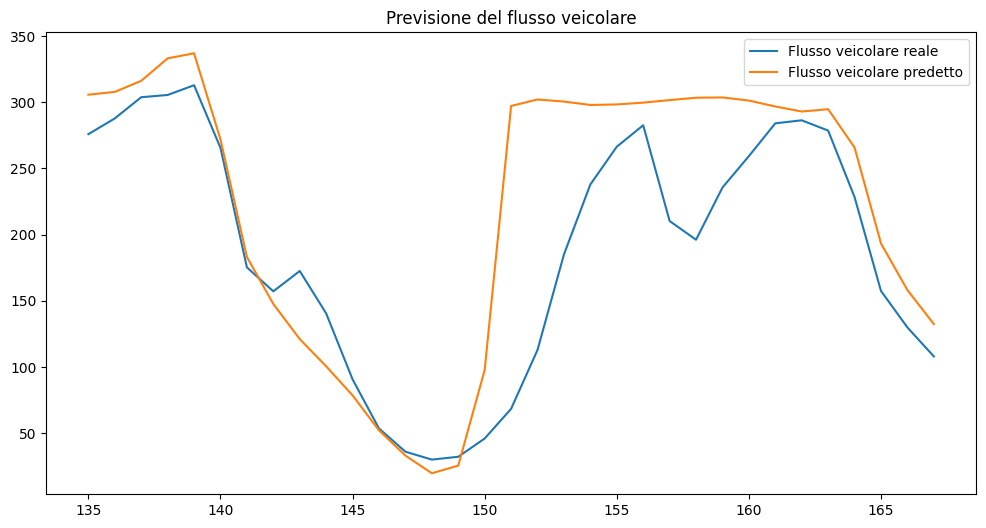

In [229]:
# Visualizzare i risultati
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['flusso veicolare'], label='Flusso veicolare reale')
plt.plot(df_results.index, df_results['flusso veicolare Pred'], label='Flusso veicolare predetto')
plt.title('Previsione del flusso veicolare')
plt.legend()
plt.show()